<a href="https://colab.research.google.com/github/itzelmor02/Aprendizaje-de-Patrones-IMG/blob/main/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Utilizar la base de datos de MNIST
*   Normalizar los datos para escalarlos entre 0 y 1
*   Balancear los datos para tener aproximadamente el mismo número de cincos y dígitos que o son cincos.

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

#Cargamos la base de datos de MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

#Balanceamos los datos
def balance_data(X, y, target_digit, balance_ratio):
    indices = np.where(y == target_digit)[0]
    num_samples = len(indices)
    num_samples_to_keep = int(num_samples * balance_ratio)
    indices_to_keep = np.random.choice(indices, num_samples_to_keep, replace=False)
    X_balanced = X[indices_to_keep]
    y_balanced = y[indices_to_keep]
    return X_balanced, y_balanced

#Escogemos un dígito para balancear (es este caso el 5)
target_digit = 5
balance_ratio = 1.0
X_train_balanced, y_train_balanced = balance_data(X_train_normalized, y_train, target_digit, balance_ratio)

#Dividimos los datos balanceados entre conjuntos de entrenamiento y de validación
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

#Mostramos los conjuntos
print("Conjutno de entrenamiento orginal:", X_train_normalized.shape, y_train.shape)
print("Conjunto de entrenamiento balanceado:", X_train_balanced.shape, y_train_balanced.shape)
print("Conjunto de validación:", X_val_balanced.shape, y_val_balanced.shape)
print("Conjunto de prueba:", X_test_normalized.shape, y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
Conjutno de entrenamiento orginal: (60000, 28, 28) (60000,)
Conjunto de entrenamiento balanceado: (4336, 28, 28) (4336,)
Conjunto de validación: (1085, 28, 28) (1085,)
Conjunto de prueba: (10000, 28, 28) (10000,)


Implementar una red neuronal multicapa con dos neuronas en la primera cpa y una en la segunda capa (salida)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

#Definimos el modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#Lo compilamos
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Entrenamiento
history = model.fit(X_train_balanced, y_train_balanced, epochs=10, validation_data=(X_val_balanced, y_val_balanced))

#Evaluamos el modelo
test_loss, test_acc = model.evaluate(X_test_normalized, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
136/136 [==============================] - 3s 10ms/step - loss: -18.9896 - accuracy: 0.0000e+00 - val_loss: -49.9016 - val_accuracy: 0.0000e+00
Epoch 2/10
136/136 [==============================] - 1s 9ms/step - loss: -103.2787 - accuracy: 0.0000e+00 - val_loss: -171.3676 - val_accuracy: 0.0000e+00
Epoch 3/10
136/136 [==============================] - 2s 12ms/step - loss: -261.4020 - accuracy: 0.0000e+00 - val_loss: -367.7585 - val_accuracy: 0.0000e+00
Epoch 4/10
136/136 [==============================] - 1s 11ms/step - loss: -493.6872 - accuracy: 0.0000e+00 - val_loss: -637.7761 - val_accuracy: 0.0000e+00
Epoch 5/10
136/136 [==============================] - 1s 8ms/step - loss: -796.9333 - accuracy: 0.0000e+00 - val_loss: -977.2332 - val_accuracy: 0.0000e+00
Epoch 6/10
136/136 [==============================] - 1s 8ms/step - loss: -1168.8232 - accuracy: 0.0000e+00 - val_loss: -1383.4221 - val_accuracy: 0.0000e+00
Epoch 7/10
136/136 [==============================] - 1s 6ms/

Entrenamiento del modelo


*   Utilizat Early Stopping monitoreando la métrica que consideres adecuada
*   Elegir los hiperparámetros y validation split adecuados



In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# DEfinimos el modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilamos
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Definimos early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Hiperparámetros
batch_size = 64
validation_split = 0.2

#Entrenamos con eraly stopping
history = model.fit(X_train_balanced, y_train_balanced, epochs=100, batch_size=batch_size,
                    validation_split=validation_split, callbacks=[early_stopping])

#Evaluamos
test_loss, test_acc = model.evaluate(X_test_normalized, y_test)
print('Test accuracy:', test_acc)


Epoch 1/100
55/55 [==============================] - 1s 9ms/step - loss: 0.5907 - accuracy: 0.0000e+00 - val_loss: 0.4462 - val_accuracy: 0.0000e+00
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.3272 - accuracy: 0.0000e+00 - val_loss: 0.2003 - val_accuracy: 0.0000e+00
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.0000e+00 - val_loss: -0.0445 - val_accuracy: 0.0000e+00
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: -0.1625 - accuracy: 0.0000e+00 - val_loss: -0.2882 - val_accuracy: 0.0000e+00
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: -0.4056 - accuracy: 0.0000e+00 - val_loss: -0.5309 - val_accuracy: 0.0000e+00
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: -0.6478 - accuracy: 0.0000e+00 - val_loss: -0.7724 - val_accuracy: 0.0000e+00
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: -0.8888 - accuracy: 0.0000

Evaluación del modelo

Epoch 1/100
55/55 [==============================] - 1s 6ms/step - loss: -4.6564 - accuracy: 0.0000e+00 - val_loss: -11.8335 - val_accuracy: 0.0000e+00
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: -19.4806 - accuracy: 0.0000e+00 - val_loss: -28.6933 - val_accuracy: 0.0000e+00
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: -38.7564 - accuracy: 0.0000e+00 - val_loss: -50.7998 - val_accuracy: 0.0000e+00
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: -63.4920 - accuracy: 0.0000e+00 - val_loss: -78.5546 - val_accuracy: 0.0000e+00
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: -93.8941 - accuracy: 0.0000e+00 - val_loss: -112.1030 - val_accuracy: 0.0000e+00
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: -130.1077 - accuracy: 0.0000e+00 - val_loss: -151.3597 - val_accuracy: 0.0000e+00
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: -172.11

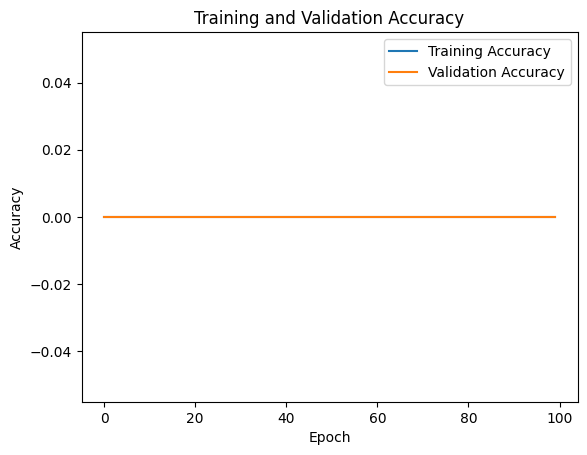

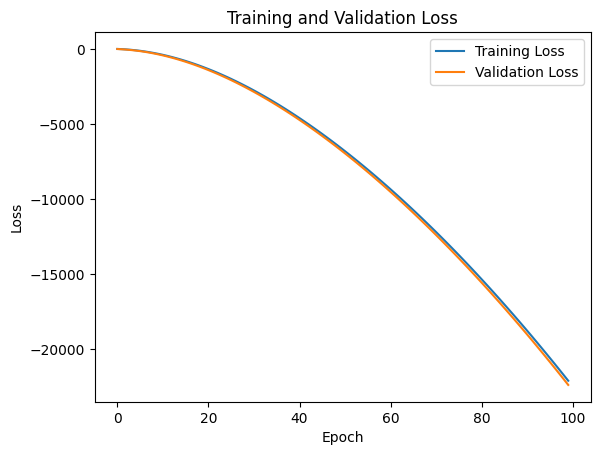

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.0892
Precision: 0.0892
Recall: 1.0
F1-score: 0.1637899375688579
Confusion Matrix:
[[   0 9108]
 [   0  892]]


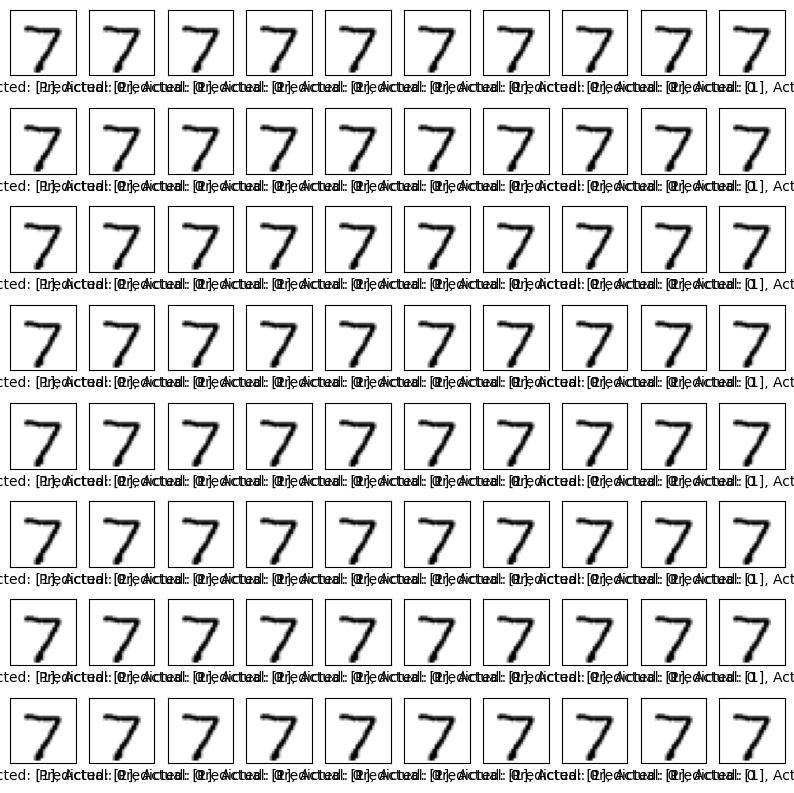

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Definimos el modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Definimos early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Hiperparametros
batch_size = 64
validation_split = 0.2

# Entrenamos el modelo con early stopping
history = model.fit(X_train_balanced, y_train_balanced, epochs=100, batch_size=batch_size,
                    validation_split=validation_split, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_normalized, y_test)
print('Test accuracy:', test_acc)

# Entrenamiento y precisión de accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Entrenamiento y validación de pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicciones con test
predictions = (model.predict(X_test_normalized) >= 0.5).astype(int)

# Convertimos a binarios (1 si originalmente era 5, 0 oen cualquier otro caso)
y_test_binary = (y_test == 5).astype(int)

# Calculamos accuracy, precision, recall y F1-score
accuracy = accuracy_score(y_test_binary, predictions)
precision = precision_score(y_test_binary, predictions)
recall = recall_score(y_test_binary, predictions)
f1 = f1_score(y_test_binary, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Encontramos los errores de clasificación
misclassified_indices = np.where(predictions != y_test_binary)[0][:80]

# Mostramos las imágenes con errores
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices):
    plt.subplot(8, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[index], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predictions[index]}, Actual: {y_test_binary[index]}')
plt.show()
